Title: The prediction of the knowledge level of users (UNS) by their standardized exam performance for related objects with goal object (LPR) and their standardized exam performance for goal object (PEG)

Introduction

We are trying to set up a model that answers the predictive question of whether the category of the knowledge level of users (UNS) could be predicted by two variables, their standardized exam performance for related objects with goal object (LPR), and their standardized exam performance for goal object (PEG) (both continuous data), in which all of the variables are from the dataset "modeling_data_xlsx". We would do this by running classification analysis for the three variables using the k-nearest neighbour algorithm. This could be significant since it could possibly show the relationship between exam scores and users' knowledge level. If this were to be true, then we would learn that we could utilize exams to test someone's knowledge level. Besides, by the correlation results, we could know whether the exam performance of users on goal objects or related objects are better predictors to UNS. This could possibly inspire future users on which object to focus on to optimize their knowledge level.

Terminology

- Response variable:
   -  UNS: Categorical and scaled variable, represents the knowledge level of the users.

- Predictive variables:
    - LPR (Learning Performance Rating): Continuous and scaled variable, the exam performance of the user for related objects with the goal object.
    - PEG: Continuous and scaled Variable, the exam performance of the user for goal objects.

Preliminary exploratory data analysis below

In [1]:
#loading packages
library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#reading the data
modeling_data <- read_excel("modeling_data_xlsx.xlsx")
modeling_data 

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


In [3]:
#cleaning the data
modeling_data_selected <- select(modeling_data, LPR, PEG, UNS)
modeling_data_selected

LPR,PEG,UNS
<dbl>,<dbl>,<chr>
0.00,0.00,very_low
0.24,0.90,High
0.25,0.33,Low
⋮,⋮,⋮
0.29,0.77,High
0.61,0.26,Middle
0.87,0.74,High


In [4]:
#splitting into training and testing data
set.seed(1)

modeling_split <- initial_split(modeling_data_selected, prop = 0.75, strata = UNS) 
modeling_training <- training(modeling_split) 
modeling_testing <- testing(modeling_split)

modeling_split
modeling_training
modeling_testing

<Training/Testing/Total>
<192/66/258>

LPR,PEG,UNS
<dbl>,<dbl>,<chr>
0.00,0.0,very_low
0.24,0.9,High
0.35,0.8,High
⋮,⋮,⋮
0.31,0.50,Middle
0.19,0.60,Middle
0.61,0.26,Middle


LPR,PEG,UNS
<dbl>,<dbl>,<chr>
0.29,0.56,Middle
0.20,0.85,High
0.30,0.81,High
⋮,⋮,⋮
0.30,0.52,Middle
0.65,0.25,Middle
0.89,0.88,High


In [5]:
#summarizing the training data (number of observations)
nrow(modeling_data_selected)

[1] 258

In [6]:
#summarizing the training data (mean)
modeling_data_summarize <- summarize(modeling_training, 
                                     mean_LPR = mean(LPR),
                                    mean_PEG = mean(PEG),
                                     )
modeling_data_summarize

mean_LPR,mean_PEG
<dbl>,<dbl>
0.425,0.4568385


In [7]:
#summarizing the data (min, max)
modeling_data_summarize <- summarize(modeling_training, 
                                     min_LPR = min(LPR),
                                    min_PEG = min(PEG),
                                    max_LPR = max(LPR),
                                    max_PEG = max(PEG),
                                    )
modeling_data_summarize

min_LPR,min_PEG,max_LPR,max_PEG
<dbl>,<dbl>,<dbl>,<dbl>
0,0,0.98,0.93


In [8]:
#summarizing the training data (standard deviation)
modeling_data_summarize <- summarize(modeling_training, 
                                    sd_LPR = sd(LPR),
                                     sd_PEG = sd(PEG)
                                    )
modeling_data_summarize

sd_LPR,sd_PEG
<dbl>,<dbl>
0.2511627,0.260728


In [12]:
#summarizing the training data (categories of UNS)

NULL

In [9]:
#change colours to colour-blindness friendly

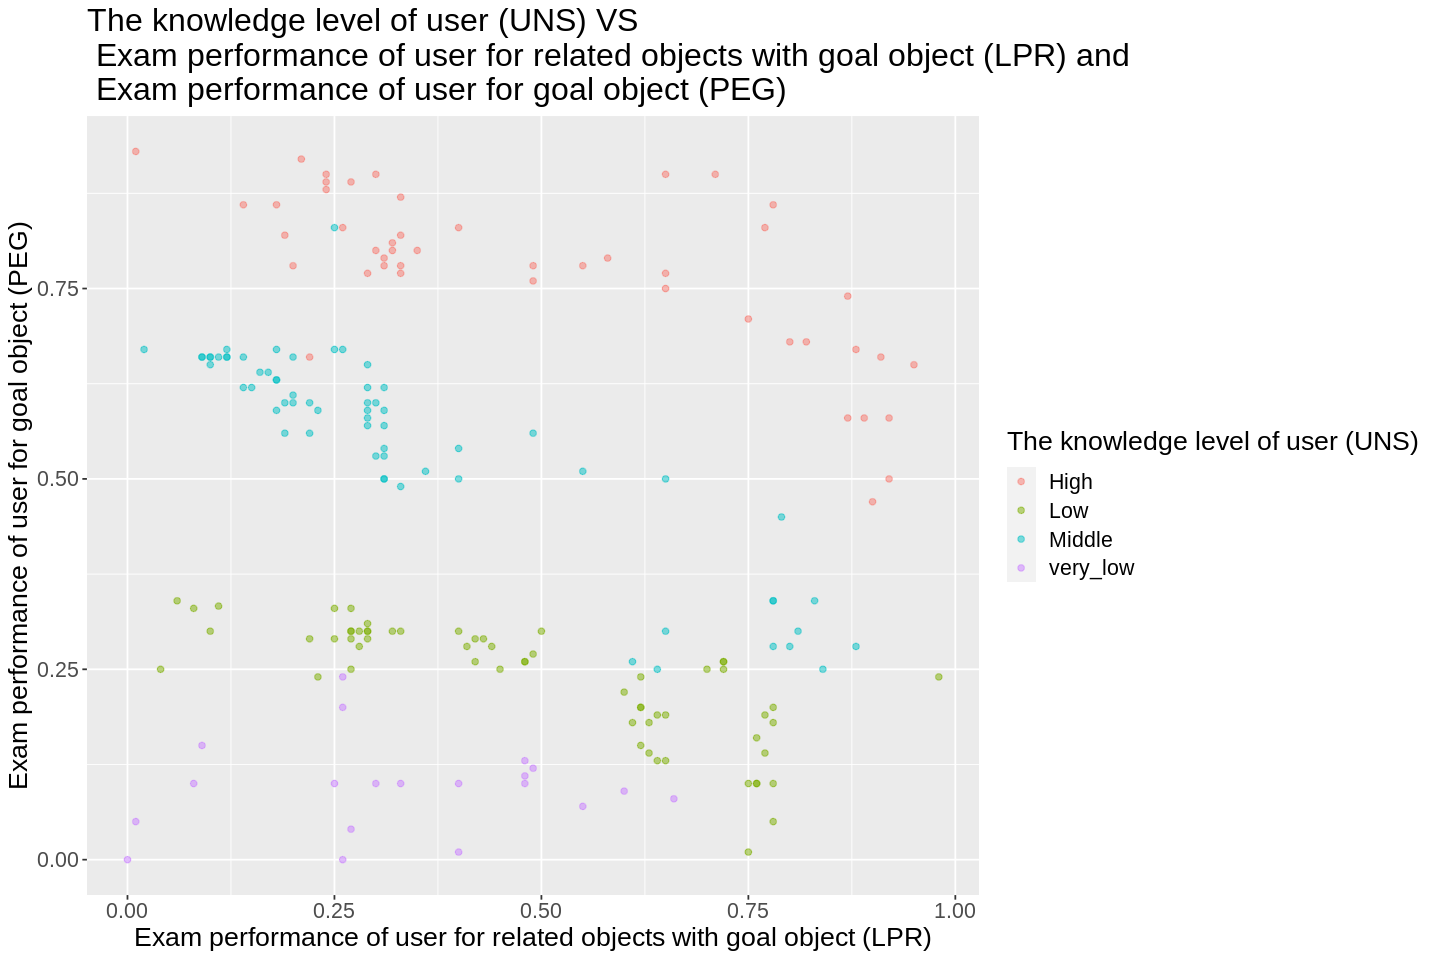

In [10]:
#visualising the data of UNS vs STG and SCG (Variables are yet standardized)
options(repr.plot.width = 12, repr.plot.height = 8)

modeling_data_plot <- ggplot(modeling_training, aes(x = LPR, y = PEG, colour = UNS)) +
        geom_point(alpha = 0.5) +
        labs(x = "Exam performance of user for related objects with goal object (LPR)", y = "Exam performance of user for goal object (PEG)" , colour = "The knowledge level of user (UNS)") +
        ggtitle("The knowledge level of user (UNS) VS \n Exam performance of user for related objects with goal object (LPR) and \n Exam performance of user for goal object (PEG)") +
        theme(text = element_text(size = 16))

modeling_data_plot

In [11]:
#create recipe for training data, a specification for k

set.seed(1)
modeling_recipe <- recipe(UNS ~ LPR + PEG, data = modeling_training) |> 
step_scale(all_predictors()) |>
step_center(all_predictors())

modeling_recipe



Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [12]:
set.seed(1)

modeling_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
set_engine("kknn") |> 
set_mode("classification")

modeling_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [13]:
#5-fold cross-validation, choose the number of neighbors via the maximum accuracy: (WE WOULD CONTINUE ON THIS LATER)
set.seed(1)
modeling_vfold <- vfold_cv(modeling_training, v = 5, strata = UNS) 
modeling_vals <- tibble(neighbors = seq(1, 101, by = 5)) 

modeling_workflow <- workflow() |> 
    add_recipe(modeling_recipe) |> 
    add_model(modeling_spec) |>
    tune_grid(resamples = modeling_vfold, grid = modeling_vals) |> 
    collect_metrics() 

modeling_workflow

In [ ]:
accuracies <- modeling_workflow |>
        filter(.metric == "accuracy")|>
        arrange(desc(mean))

accuracies

In [ ]:
#Choose the optimal K to run the full analyis on test

modeling_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 6)|>
        set_engine("kknn") |> 
        set_mode("classification")

modeling_workflow_fit <- workflow()|> 
        add_recipe(modeling_recipe) |>
        add_model(modeling_spec_2) |> 
        fit(data = modeling_training)
modeling_workflow_fit


In [ ]:

#Confusion matrix (To be done later)

set.seed(1)

modeling_predict <- modeling_workflow_fit |> 
        predict(modeling_testing) |> 
        bind_cols(modeling_testing)|>
        select(.pred_class) |>
        pull()

modeling_predict  

modeling_conf_mat <- conf_mat(modeling_predict, 

modeling_conf_mat

Methods

We will use the publicly available data "modeling_data_xlsx" on examination scores and knowledge level from the University of California. We selected the variables LPR, PEG, and UNS. In particular, the predictors would be LPR, and PEG, both continous, while the response variable would be the categorical variable UNS. We are going to split the data into training set and testing set with the ratio 3:1 on random, and carry out classification analysis using the k-nearest neighbours algorithm, with 5-fold cross-validation on the training set. We will pick the optimal k-value with the highest accuracy, and carry out predictions on UNS on the testing set. We will then re-evaluate the accuracy of our prediction model by computing its prediction accuracy (calculated by dividing the number of correct predictons by the total number of predictions). To visulize our results, we would graph a 2D scatter-plot, for UNS vs LPR and PEG. We also show its confusion matrix to further evaluate its usefulness, and determine if the two independent variables are strong predictors of UNS.


Expected outcomes and significance

We expect there be positive relationships of the response variable, UNS, with both predictors (LPR and PEG), with the relationship possibly being linear, since exam usually reflects ability very well. We expect our model to have a predictive accuracy of around 93-97% accuracy. 

We expect our findings could possibly inspire ourselves and our classmates on that examination performances are good predictors of our academic ability.

WE also expect the relationship between PEG and UNS to be much stronger, since PEG is in fact related to the maing goal object. We still expect a moderate/weak positive relationship between LPR and UNS though. This could possibly inspire students on whether studying for the main goal object or related objects are more important.

This could lead to the future question of how such knowledge could correlate to job success, in order to link examination scores with job success. We can also examine how studying main goal objects improve knowledge better than related objects (the mechanics behind). The input variables such as study time on objects could also be examined to see if there are relationships between them and knowledge levels.
